**Name:** Rakshanda S. Chavan | **Student Number:** 20200654 | **API Name:** The New York Times Developer AI

## Assignment - 1 Analysis of New York Times articles headlines.

In [1]:
import os
import json
import time
import requests
import datetime
import dateutil
import pandas as pd
from dateutil.relativedelta import relativedelta

### Task 1: Choosing one or more APIs from the list of public web APIs 
**API Chosen:**
<br>
<br>
A single API was chosen for this assignment from https://developer.nytimes.com/
<br><br>
Specifically, the New York Times archived articles API - https://api.nytimes.com/svc/archive/v1/2020/1.json?api-key=[key]
<br><br>
The API returns an array of NYT articles for a given month, going back to 1851.
<br><br>
The API key I received which works here is wp9T0svDor4El5NAAK2jVMGZk9AG2oxk
<br><br>


In [2]:
#We are analyzing headlines of articles of 7 months from January 2020 to July 2020
months_in_range = [['2020','1'],['2020','2'],['2020','3'],['2020','4'],['2020','5'],['2020','6'],['2020','7']]
months_in_range

start = datetime.date(2020,1,1)
end = datetime.date(2020,7,31)



### Task 2: Collect data your chosen API(s)
**Collecting Data - Functions needed:**
<br><br>
**We can retrieve data for one month per call to the API. We're using data of months 1/2020 to 7/2020.**
<br>The following 3 functions were written to allow multiple calls of the API as only limited data(per month) is available per call.
<br><br>
These function are commented throughout and are called below:

- We make 7 calls to the API to collect data for seven months and saved the data in separate csv files.
- We are saving only some fields from the json that we require like date, headline,doc_type,section and keywords of the article.
- We also save rows for which headlines are present and do not save rows for which headlines are missing.

In [3]:
def send_request(date):
    #Sends a request to the NYT Archive API for a given month.
    base_url = 'https://api.nytimes.com/svc/archive/v1/'
    url = base_url + '/' + date[0] + '/' + date[1] + '.json?api-key=wp9T0svDor4El5NAAK2jVMGZk9AG2oxk'
    response = requests.get(url).json()
    with open('articles.json', 'a') as json_file:
        json.dump(response, json_file)
    time.sleep(6)
    return response


def is_valid(article, date):
    #checking if an article is in range, and has a headline as we will be doing the analysis on headlines.
    is_in_range = date > start and date < end
    has_headline = type(article['headline']) == dict and 'main' in article['headline'].keys()
    return is_in_range and has_headline


def parse_response(response):
    #Parses and returns response as pandas data frame. I have selected only the below fields from json for further analysis.
    data = {'headline': [],  
        'date': [], 
        'doc_type': [],
        'material_type': [],
        'section': [],
        'keywords': []}
    
    articles = response['response']['docs'] 
    for article in articles: # For each article, make sure it falls within our date range
        date = dateutil.parser.parse(article['pub_date']).date()
        if is_valid(article, date):
            data['date'].append(date)
            data['headline'].append(article['headline']['main']) 
            if 'section' in article:
                data['section'].append(article['section_name'])
            else:
                data['section'].append(None)
            data['doc_type'].append(article['document_type'])
            if 'type_of_material' in article: 
                data['material_type'].append(article['type_of_material'])
            else:
                data['material_type'].append(None)
            keywords = [keyword['value'] for keyword in article['keywords'] if keyword['name'] == 'subject']
            data['keywords'].append(keywords)
    return pd.DataFrame(data) 


def get_data(dates):
    #Sends and parses request/response to/from NYT Archive API for given dates.
    total = 0
    print('Date range: ' + str(dates[0]) + ' to ' + str(dates[-1]))
    if not os.path.exists('headlines'):
        os.mkdir('headlines')
    for date in dates:
        response = send_request(date)
        df = parse_response(response)
        total += len(df)
        df.to_csv('headlines/' + date[0] + '-' + date[1] + '.csv', index=False)
        print('Saving headlines/' + date[0] + '-' + date[1] + '.csv...')
    print('Number of articles collected: ' + str(total))

### Task 3: Parse the collected data, and store it in an appropriate file format
**Collecting Raw Data and writing raw data to CSV:**
<br><br>
The following code retreives the data using the above Functions from the API and writes it to a CSV file.
<br><br>
This data needs extensive cleaning and manipulation before it can be used.

In [4]:
get_data(months_in_range)

Date range: ['2020', '1'] to ['2020', '7']
Saving headlines/2020-1.csv...
Saving headlines/2020-2.csv...
Saving headlines/2020-3.csv...
Saving headlines/2020-4.csv...
Saving headlines/2020-5.csv...
Saving headlines/2020-6.csv...
Saving headlines/2020-7.csv...
Number of articles collected: 31645


### Task 4: Load and represent the data using an appropriate data structure. 

**Utilising Pandas and further Data Modification**
<br><br>
- With the CSV files written these are imported using Pandas into dataframes.
- As we have text data we need to prepare it before further processing.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
jan_df = pd.read_csv('headlines/2020-1.csv', parse_dates=True, index_col='date')
feb_df = pd.read_csv('headlines/2020-2.csv', parse_dates=True, index_col='date')
mar_df = pd.read_csv('headlines/2020-3.csv', parse_dates=True, index_col='date')
apr_df = pd.read_csv('headlines/2020-4.csv', parse_dates=True, index_col='date')
may_df = pd.read_csv('headlines/2020-5.csv', parse_dates=True, index_col='date')
jun_df = pd.read_csv('headlines/2020-6.csv', parse_dates=True, index_col='date')
jul_df = pd.read_csv('headlines/2020-7.csv', parse_dates=True, index_col='date')

df_list = [jan_df,feb_df,mar_df,apr_df,may_df,jun_df,jul_df]

**For Jan month we can see below that we retrieved 4390 rows of headlines which are non-null.**

In [6]:
jan_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4390 entries, 2020-01-02 to 2020-01-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   headline       4390 non-null   object 
 1   doc_type       4390 non-null   object 
 2   material_type  4387 non-null   object 
 3   section        0 non-null      float64
 4   keywords       4390 non-null   object 
dtypes: float64(1), object(4)
memory usage: 205.8+ KB


### Task 5: Pre-processing the data and cleaning it before using it for further analysis 
<br>We need to analyze and clean all the headlines so we get useful data. First, we join each headline into one string. Then, we split the string into a list where each word is a list item.

In [7]:
# join the strings of every row
sentences_jan = jan_df['headline'].str.cat(sep = '')
sentences_feb = feb_df['headline'].str.cat(sep = '')
sentences_mar = mar_df['headline'].str.cat(sep = '')
sentences_apr = apr_df['headline'].str.cat(sep = '')
sentences_may = may_df['headline'].str.cat(sep = '')
sentences_jun = jun_df['headline'].str.cat(sep = '')
sentences_jul = jul_df['headline'].str.cat(sep = '')

### Tokenization
I used the function word_tokenizer() to split sentences into words based on punctuation like spaces and commas.

In [8]:
from nltk.tokenize import word_tokenize
tok_jan = word_tokenize(sentences_jan)
tok_feb = word_tokenize(sentences_feb)
tok_mar = word_tokenize(sentences_mar)
tok_apr = word_tokenize(sentences_apr)
tok_may = word_tokenize(sentences_may)
tok_jun = word_tokenize(sentences_jun)
tok_jul = word_tokenize(sentences_jul)

### Punctuation and Stopwords Removal

- We removed the punctuation marks from the sentences to make it less noisy.
- Then we also remove the stop words from the list of words as they do not contribute to the actual meaning of the sentences like it,the,he etc. They are words that do not convey much content, they are not contentful They are also often very frequent and can effects norms and counting
- I’ve also filtered all words with a length greater than 3.

In [9]:
import string
string.punctuation
from nltk.corpus import stopwords
tok_jan = [char for char in tok_jan if char not in string.punctuation]
tok_feb = [char for char in tok_feb if char not in string.punctuation]
tok_mar = [char for char in tok_mar if char not in string.punctuation]
tok_apr = [char for char in tok_apr if char not in string.punctuation]
tok_may = [char for char in tok_may if char not in string.punctuation]
tok_jun = [char for char in tok_jun if char not in string.punctuation]
tok_jul = [char for char in tok_jul if char not in string.punctuation]

# remove stopwords
stop = stopwords.words('english')
tok_jan = [token for token in tok_jan if token not in stop]
tok_feb = [token for token in tok_feb if token not in stop]
tok_mar = [token for token in tok_mar if token not in stop]
tok_apr = [token for token in tok_apr if token not in stop]
tok_may = [token for token in tok_may if token not in stop]
tok_jun = [token for token in tok_jun if token not in stop]
tok_jul = [token for token in tok_jul if token not in stop]

# remove words less than three letters
tok_jan = [word for word in tok_jan if len(word) >= 3]
tok_feb = [word for word in tok_feb if len(word) >= 3]
tok_mar = [word for word in tok_mar if len(word) >= 3]
tok_apr = [word for word in tok_apr if len(word) >= 3]
tok_may = [word for word in tok_may if len(word) >= 3]
tok_jun = [word for word in tok_jun if len(word) >= 3]
tok_jul = [word for word in tok_jul if len(word) >= 3]

tok_list = [tok_jan,tok_feb,tok_mar,tok_apr,tok_may,tok_jun,tok_jul]

### Task 6: Analyse and summarise the cleaned dataset

#### WordCloud

**See the most cited words of each month**
<br>We can generate a word cloud of each month's headlines, to obtain an intuitive visualization of the most used words in the headlines according to their size.
<br>We can quickly see which words have increased their frequency over these seven months.
<br>The size and color of the words that appears in the wordcloud indicate it’s frequency or importance in the articles.

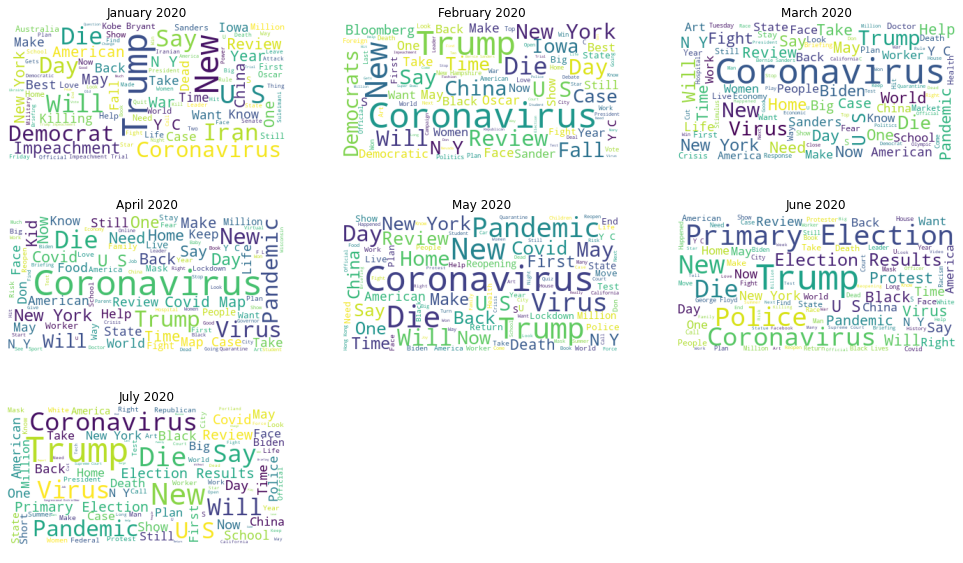

In [10]:
#!pip install WordCloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

import calendar
def DrawWC(i):
    if i < len(tok_list):
        return wc.generate_from_text(' '.join(tok_list[i]))

fig, axes = plt.subplots(3, 3, figsize=(17, 10))

i = 0
for r in range(3):
    for c in range(3):
        wc = WordCloud(max_font_size=50, max_words=100, background_color="white")
        wordcloud = DrawWC(i)
        i += 1
        ax = axes[r][c]
        if i < 8:
            ax.imshow(wordcloud)
            ax.set_title(calendar.month_name[i] + " 2020")
        ax.axis('off')


- From the above wordclouds we can cleary see what the month's articles were about.
- Words having the highest frequency have greater size.
- In january words like Coronavirus,Pandemic,Trump, US, Iran, Die, Kobe Bryant are seen which tell us that the articles were about them and the happenings in the month January(war against Iran, death of Kobe Bryant, start of pandemic). Similarly we can observe for every month to see what the articles in that month were about.
- We can conclude that the months February, March, April and May had the highest number of articles about coronavirus and that is understandable as the virus had started spreading fast from that time.

#### Getting the frequency distribution of the words

For the next plot, the first 50 most cited words were selected. We can see the frequency distribution(count) of words in each months article headlines. 

In [11]:

%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

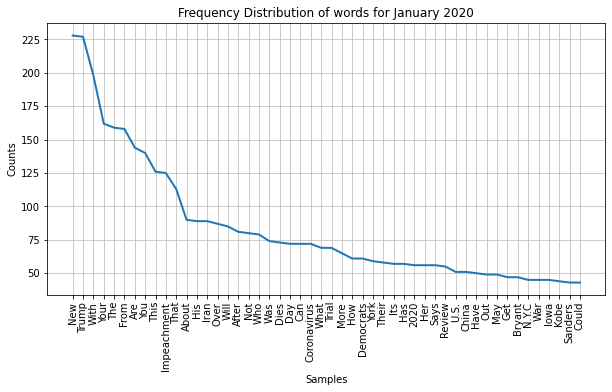

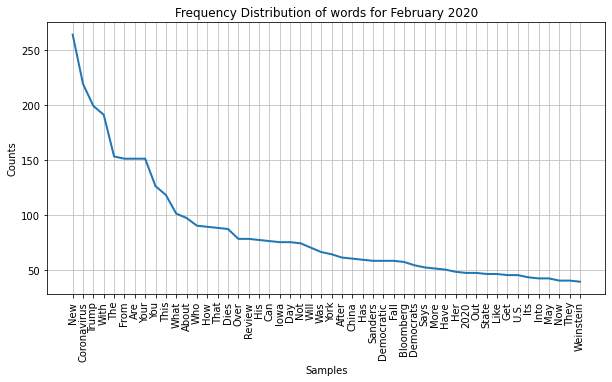

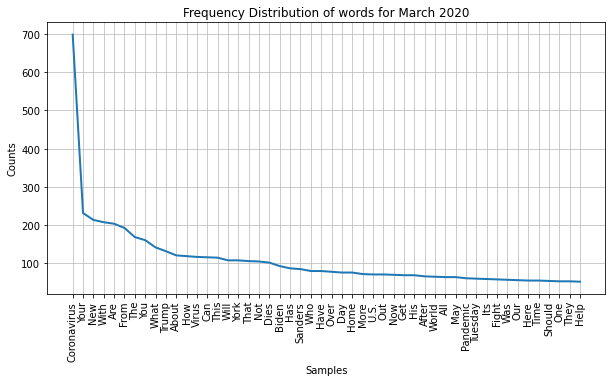

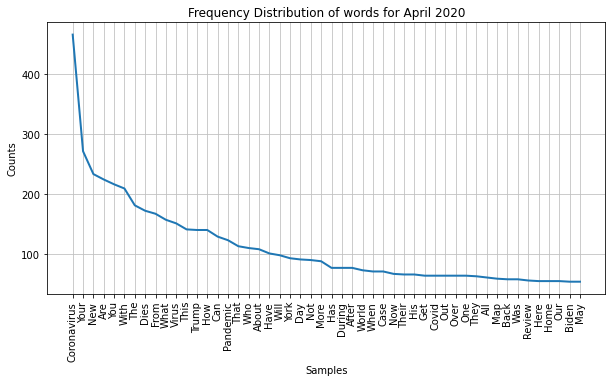

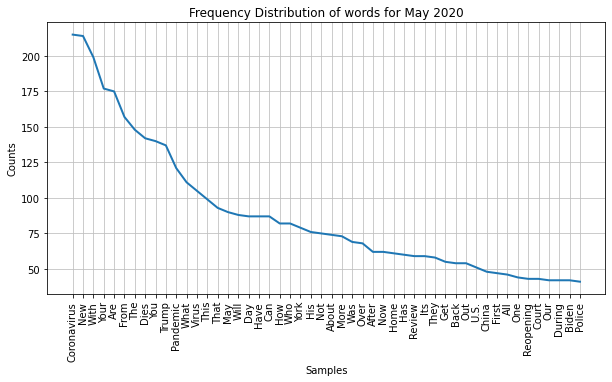

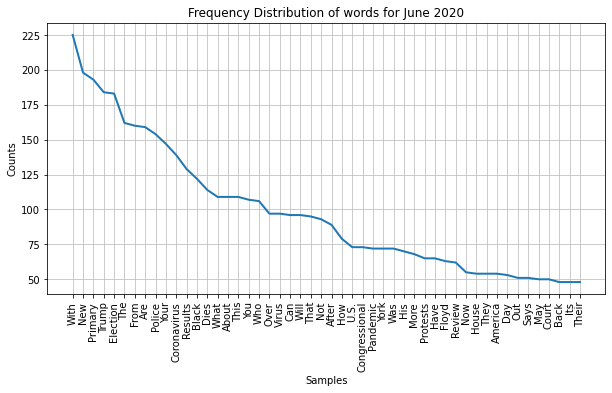

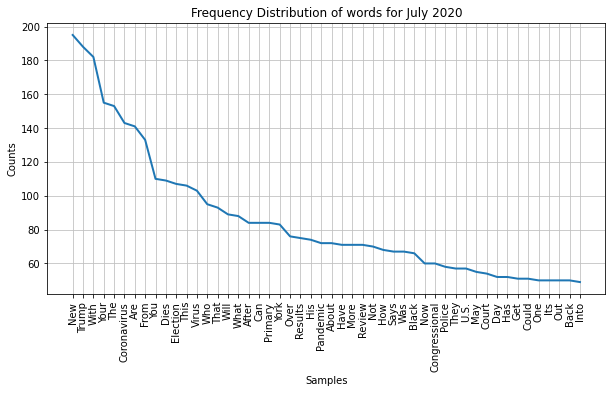

In [12]:
#Added the above piece of code to avoid auto-scrolling display of output for the next visualizations.
import operator
freq_dis_jan={}
freq_dis_feb={}
freq_dis_mar={}
freq_dis_apr={}
freq_dis_may={}
freq_dis_jun={}
freq_dis_jul={}

freq_dis = [freq_dis_jan,freq_dis_feb,freq_dis_mar,freq_dis_apr,freq_dis_may,freq_dis_jun,freq_dis_jul]

for i in freq_dis:
    for tok in i:
        if tok in i:
            i[tok] += 1
        else:
            i[tok] = 1

i = 0
for freq in freq_dis:
    #We want to sort this dictionary on values ( freq in this case )
    sorted_freq_jan = sorted(freq.items(), key=operator.itemgetter(1), reverse=True)
    #print(sorted_freq_jan[:25])
    plt.figure(figsize=(10, 5))
    plt.title("Frequency Distribution of words for "+ calendar.month_name[i+1] + " 2020")
    Freq_dist_nltk=nltk.FreqDist(tok_list[i])
    Freq_dist_nltk.plot(50, cumulative=False)
    i += 1



**Frequency Distribution Analysis**
- The word “Coronavirus” saw a large increase in headline quotes from February(250) to March(700), when the pandemic was established by the WHO.
- Another observation is that the word “police” and "Floyd" came to be in June after the death of George Floyd in late May.
- In the end, we can see the words “Trump” and "Congressional" gain relevance in June and July, as the US presidential elections approach.

#### Histogram for sentence length analysis
The below histograms show that news headlines for all months range from 5 to 100 characters and generally, it is between 50 to 70 characters.

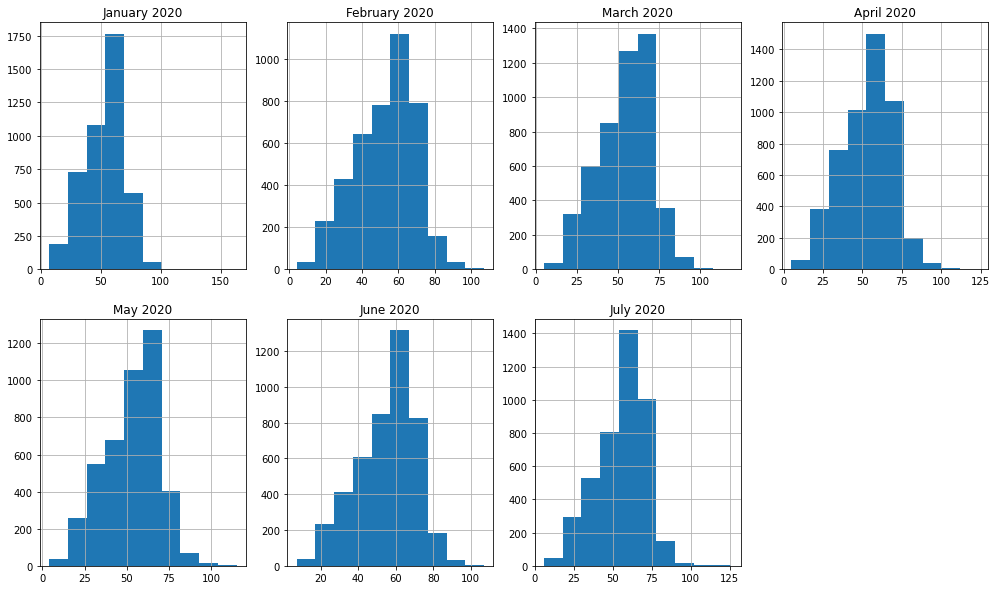

In [13]:
fig, axes = plt.subplots(2, 4, figsize=(17, 10),squeeze=False)

i = 0
for r in range(2):
    for c in range(4):
        if i < 7:
            df_list[i]['headline'].str.len().hist(ax= axes[r][c])
            axes[r][c].set_title(calendar.month_name[i+1] + " 2020")
            i +=1
        else:
            fig.delaxes(axes[1][3])
       

#### Sentiment Analysis
<br>
Sentiment analysis is a processing task which determines whether a given text is positive, negative or neutral. We will use it to find the sentiment associated with the headlines of the articles which will give us an idea about the sentiments of the article.
<br><br>
We are using Textblob for sentiment analysis of the headlines which will return two properties - polarity and subjectivity.
- Polarity lies in the range of [-1,1] where a value closer to 1 means positive statement and closer to -1 means a negative statement.
- Subjectivity refers to how someone's judgment is shaped by personal opinions and feelings. Subjectivity is represented as a floating-point value which lies in the range of [0,1].
<br><br>Polarity and subjectivity for headlines of all months is closer to 1 i.e. positive.

In [14]:
#!pip install -U textblob
from textblob import TextBlob
print("January: " + str(TextBlob(sentences_jan).sentiment))
print("February: " + str(TextBlob(sentences_feb).sentiment))
print("March: " + str(TextBlob(sentences_mar).sentiment))
print("April: " + str(TextBlob(sentences_apr).sentiment))
print("May: " + str(TextBlob(sentences_may).sentiment))
print("June: " + str(TextBlob(sentences_jun).sentiment))
print("July: " + str(TextBlob(sentences_jul).sentiment))

January: Sentiment(polarity=0.07120943399581782, subjectivity=0.4018123675482035)
February: Sentiment(polarity=0.0847772238734019, subjectivity=0.4207433842813855)
March: Sentiment(polarity=0.0838795124414333, subjectivity=0.42997756722872676)
April: Sentiment(polarity=0.08459137633417754, subjectivity=0.43077871535789947)
May: Sentiment(polarity=0.08608055900531317, subjectivity=0.4264306398092687)
June: Sentiment(polarity=0.0911190941354286, subjectivity=0.4179063728814576)
July: Sentiment(polarity=0.08161156953047773, subjectivity=0.39917510952196045)


**We will now visualize the polarity of headlines using a histogram and explore data even further.**
<br><br>
We can see from the below histograms that the polarity of headlines for all months mainly ranges between 0.00 and 0.50. 
<br>This indicates that the majority of the news headlines are neutral.

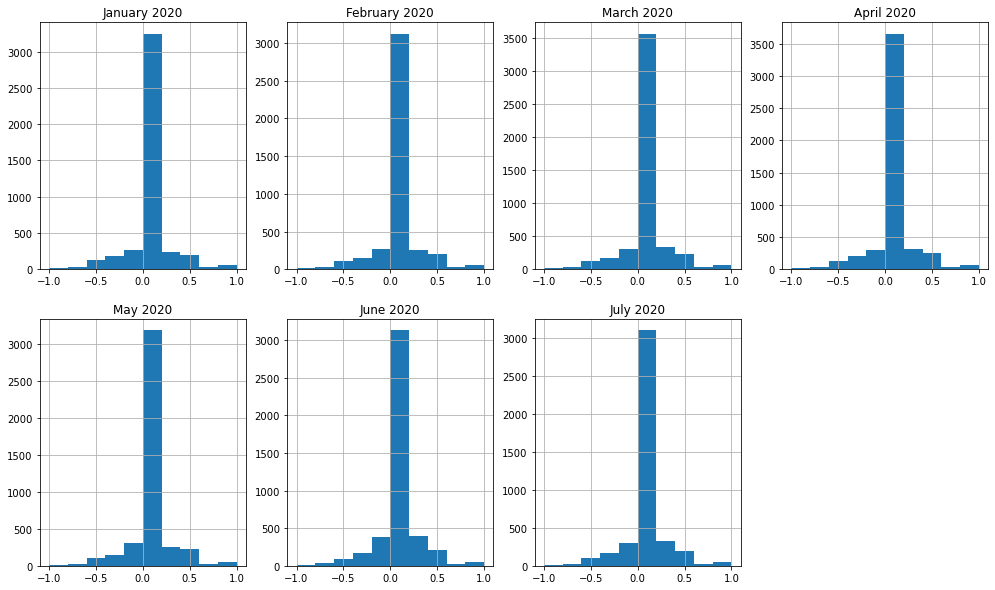

In [15]:
def polarity(text):
    txt = str(text)
    return TextBlob(txt).sentiment.polarity

fig, axes = plt.subplots(2, 4, figsize=(17, 10))

i = 0
for r in range(2):
    for c in range(4):
        if i < 7:
            df_list[i]['polarity_score']=df_list[i]['headline'].apply(lambda x : polarity(x))
            df_list[i]['polarity_score'].hist(ax=axes[r][c])
            axes[r][c].set_title(calendar.month_name[i+1] + " 2020")
            i +=1
        else:
            fig.delaxes(axes[1][3])
                    

**Now we'll analyse it further and classsify the headlines into 3 categories positive, negative and neutral**
<br><br>
From the below histograms we can see that majority of the headlines are neutral while few of them have a positive tone while very few have a negative tone.

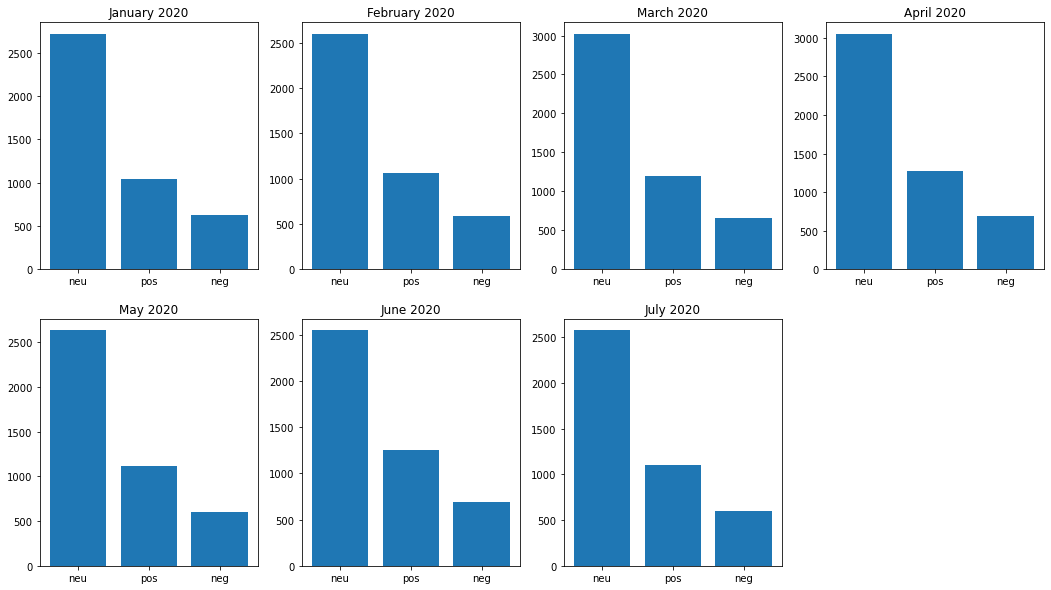

In [16]:
def sentiment(x):
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'

fig, axes = plt.subplots(2,4,figsize=(18,10))

for i in range(7):
    plt.subplot(2,4,i+1)
    df_list[i]['polarity']=df_list[i]['polarity_score'].map(lambda x: sentiment(x))
    plt.bar(df_list[i].polarity.value_counts().index,df_list[i].polarity.value_counts())
    plt.title(calendar.month_name[i+1] + " 2020")
    
fig.delaxes(axes[1][3])    
                   

**Below are a few headlines which were categorised as positive and negative**

In [17]:
jan_df[jan_df['polarity']=='pos']['headline'].head()

date
2020-01-02    In Rose Bowl Victory Over Wisconsin, Oregon Sh...
2020-01-02    Don Larsen, Yankee Who Pitched Only Perfect Ga...
2020-01-02    Taiwan’s Top Military Official and 7 Others Di...
2020-01-02                                   New Year, New You?
2020-01-02    ‘Surviving R. Kelly’ Night One Recap: Threats ...
Name: headline, dtype: object

In [18]:
jan_df[jan_df['polarity']=='neg']['headline'].head()

date
2020-01-02    Coast Guard Suspends Search for 5 Missing Afte...
2020-01-02    India Cold Wave Breaks Records, Shuts Schools ...
2020-01-02    Quotation of the Day: Pika-Who? How Canada’s M...
2020-01-02    Head-Scarf Ban and Carbon Taxes: Austria Gets ...
2020-01-02               Hypersonic Missiles Are a Game Changer
Name: headline, dtype: object

### Conclusion and further analysis

**Conclusion**
<br>It is possible to analyse text data as seen above. We saw how with the use of multiple nlp techniques we can analyse text data. Various NLTK packages can be used for processing of data. Sentiment of the articles can help us understand how many positive or negative articles were released in that month. With the use of word cloud and text frequences we saw how without having to read all the articles we got to know what the articles in that month were about. Thus, we can find alot of information without having to manually go through the text data which saves us time and efforts.

**Further analysis**
- We can do further analysis to check the importance/frequency of certain words in the different months. 
- We can also analyse what time of words or phrases are most used in the headlines.
- Check the occurences of bi-grams in the articles to gain more insight of the articles.
- Analysis can also be done based on the writers who wrote the articles and we can observe what types of articles the writes, type of vocabulary used, number of articles written in a period of time etc.